In [57]:
import os
thispath = '/home/dreuter/Github/python-paths/Python_A-Z'
os.chdir(thispath)
print(os.getcwd())

/home/dreuter/Github/python-paths/Python_A-Z


In [58]:
#%% #Categorical varibles
import pandas as pd
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film                         559 non-null object
Genre                        559 non-null object
Rotten Tomatoes Ratings %    559 non-null int64
Audience Ratings %           559 non-null int64
Budget (million $)           559 non-null int64
Year of release              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [59]:
movies.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating',
              'BudgetMillion', 'Year']
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [61]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [62]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [63]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

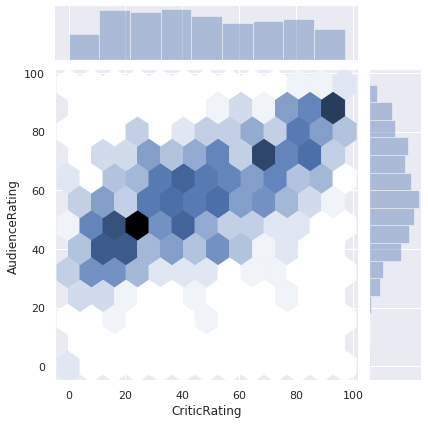

In [9]:
#Jointplots
j1 = sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

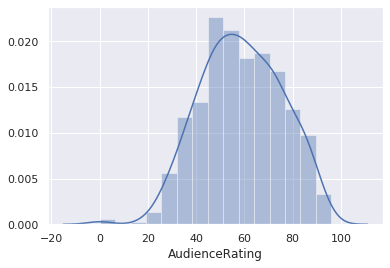

In [10]:
# Histograms
m1 = sns.distplot(movies.AudienceRating, bins=15)

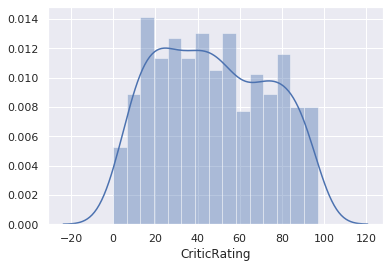

In [11]:
m2 = sns.distplot(movies.CriticRating, bins=15)

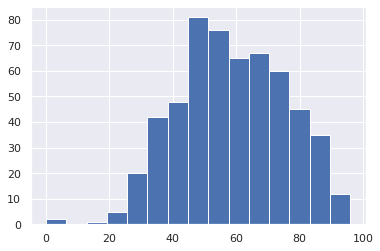

In [12]:
n1 = plt.hist(movies.AudienceRating, bins=15)

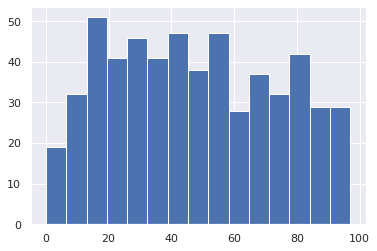

In [13]:
n1 = plt.hist(movies.CriticRating, bins=15)

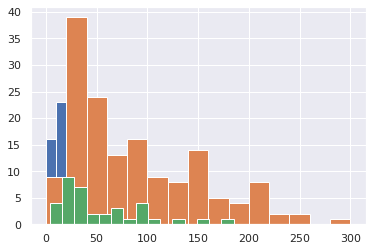

In [14]:
#Stacked Histograms
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillion, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion, bins=15)
plt.show()

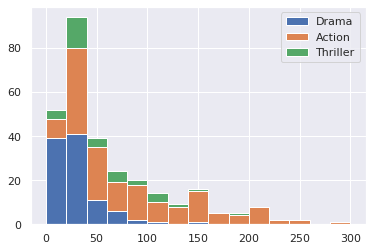

In [15]:
stackedlist = [movies[movies.Genre == 'Drama'].BudgetMillion,
movies[movies.Genre == 'Action'].BudgetMillion,
movies[movies.Genre == 'Thriller'].BudgetMillion]
plt.hist(stackedlist, bins=15, stacked=True, label=['Drama','Action','Thriller'])
plt.legend()
plt.show()

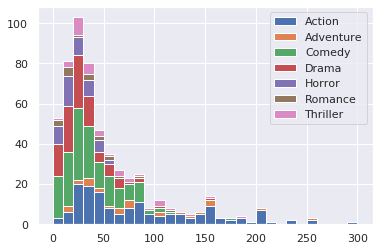

In [16]:
genres = list(movies.Genre.cat.categories)
stackedlist = []
for genre in genres:
       stackedlist.append(movies[movies.Genre == genre].BudgetMillion)
plt.hist(stackedlist, bins=30, stacked=True, label=genres)
plt.legend()
plt.show()

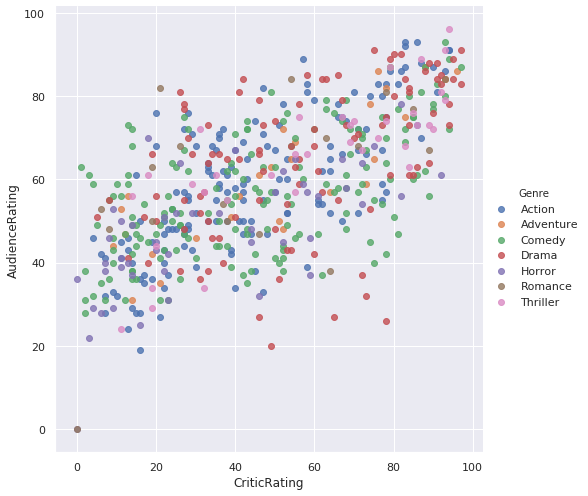

In [17]:
# KDE Plot
vis1 = sns.lmplot(data=movies,
                     x='CriticRating',
                     y='AudienceRating',
                     fit_reg=False,
                     hue='Genre',
                     height=7,
                     aspect=1)

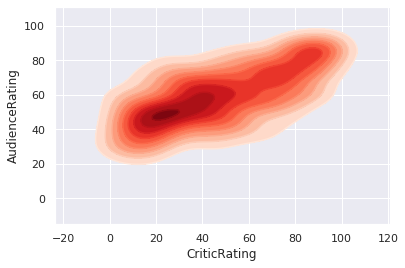

In [18]:
k1 = sns.kdeplot(movies.CriticRating,
                 movies.AudienceRating,
                 shade=True,
                 shade_lowest=False,
                 cmap='Reds')
k1b = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  cmap='Reds')
plt.show()

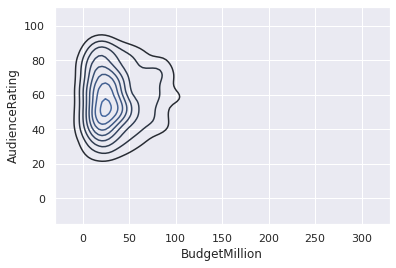

In [19]:
k1 = sns.kdeplot(movies.BudgetMillion,
                 movies.AudienceRating)

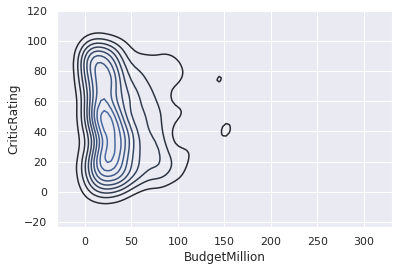

In [20]:
k2 = sns.kdeplot(movies.BudgetMillion,
                 movies.CriticRating)

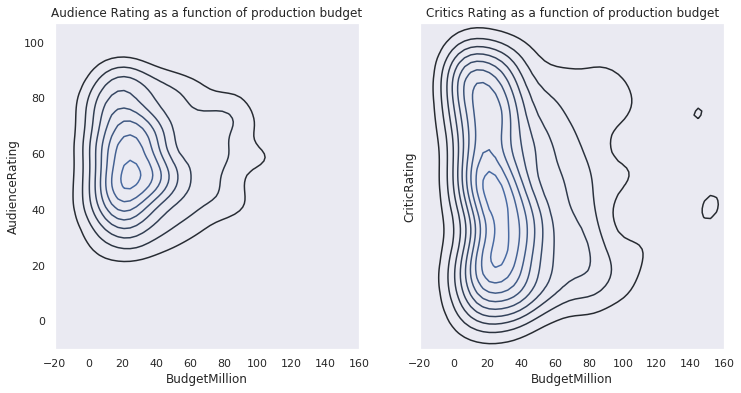

In [21]:
# Subplots
sns.set_style('dark')
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
plt.show()

In [65]:
#ViolinPlots
sns.set(rc={'figure.figsize':(7,4)})

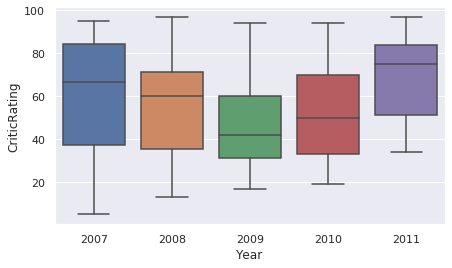

In [69]:
#w = sns.boxplot(data=movies, x='Genre', y='CriticRating')
w = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

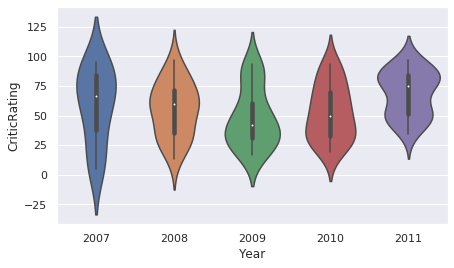

In [68]:
#z = sns.violinplot(data=movies, x='Genre', y='CriticRating')
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

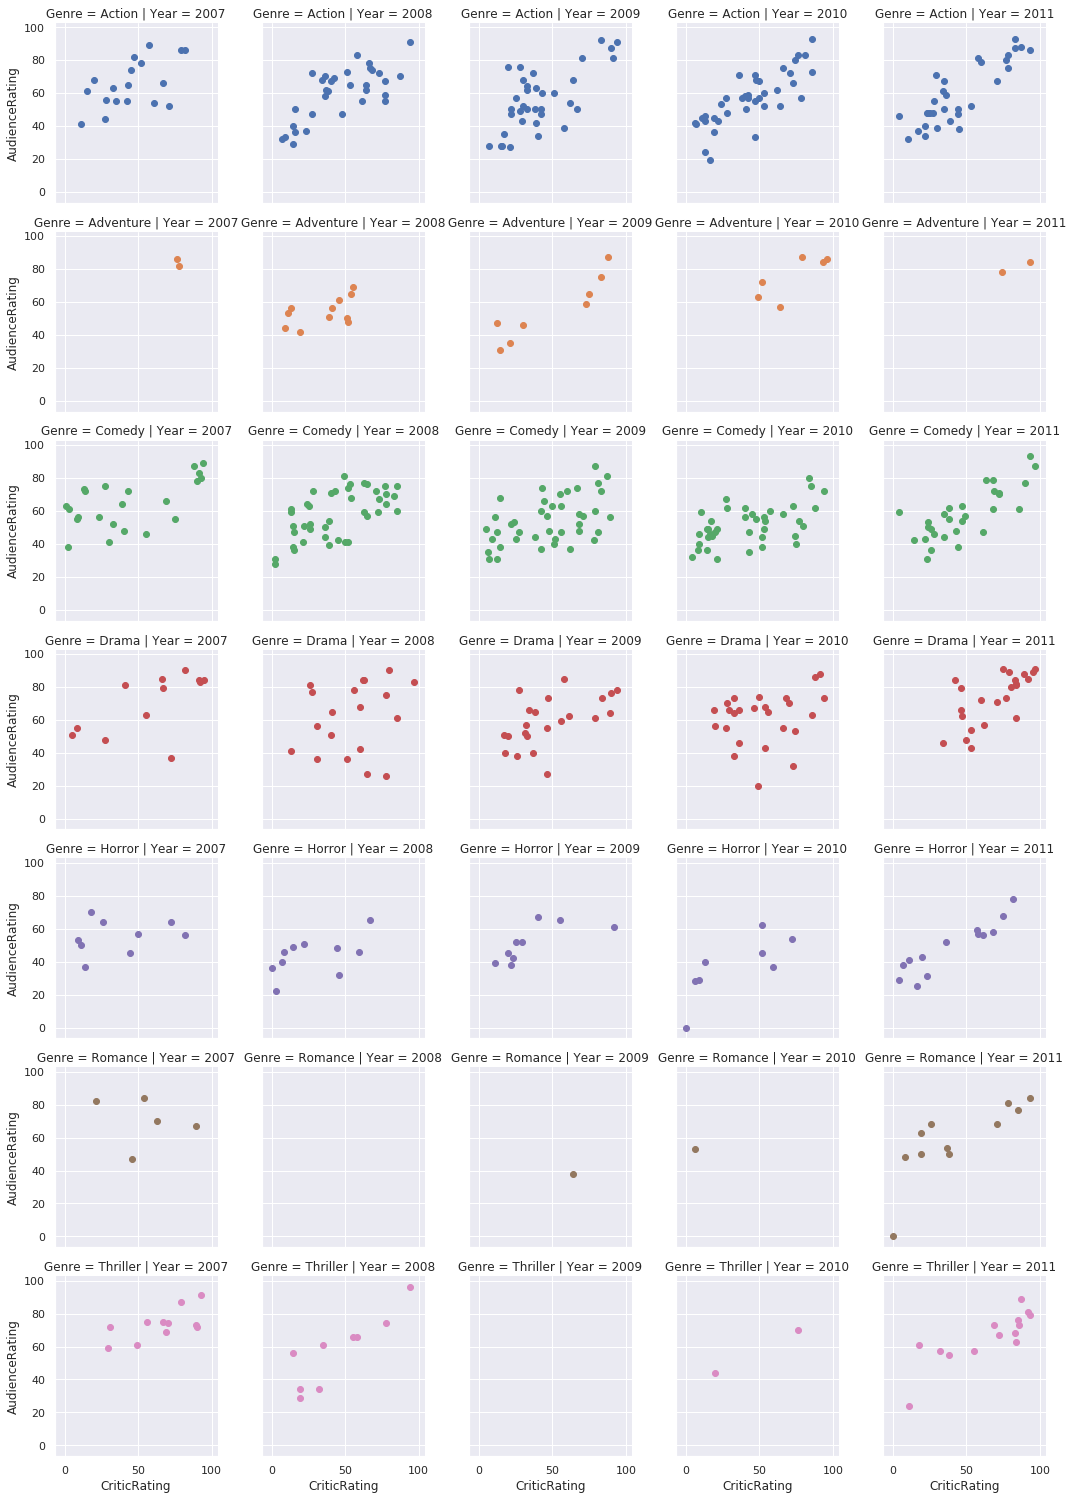

In [73]:
#FacetGrid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

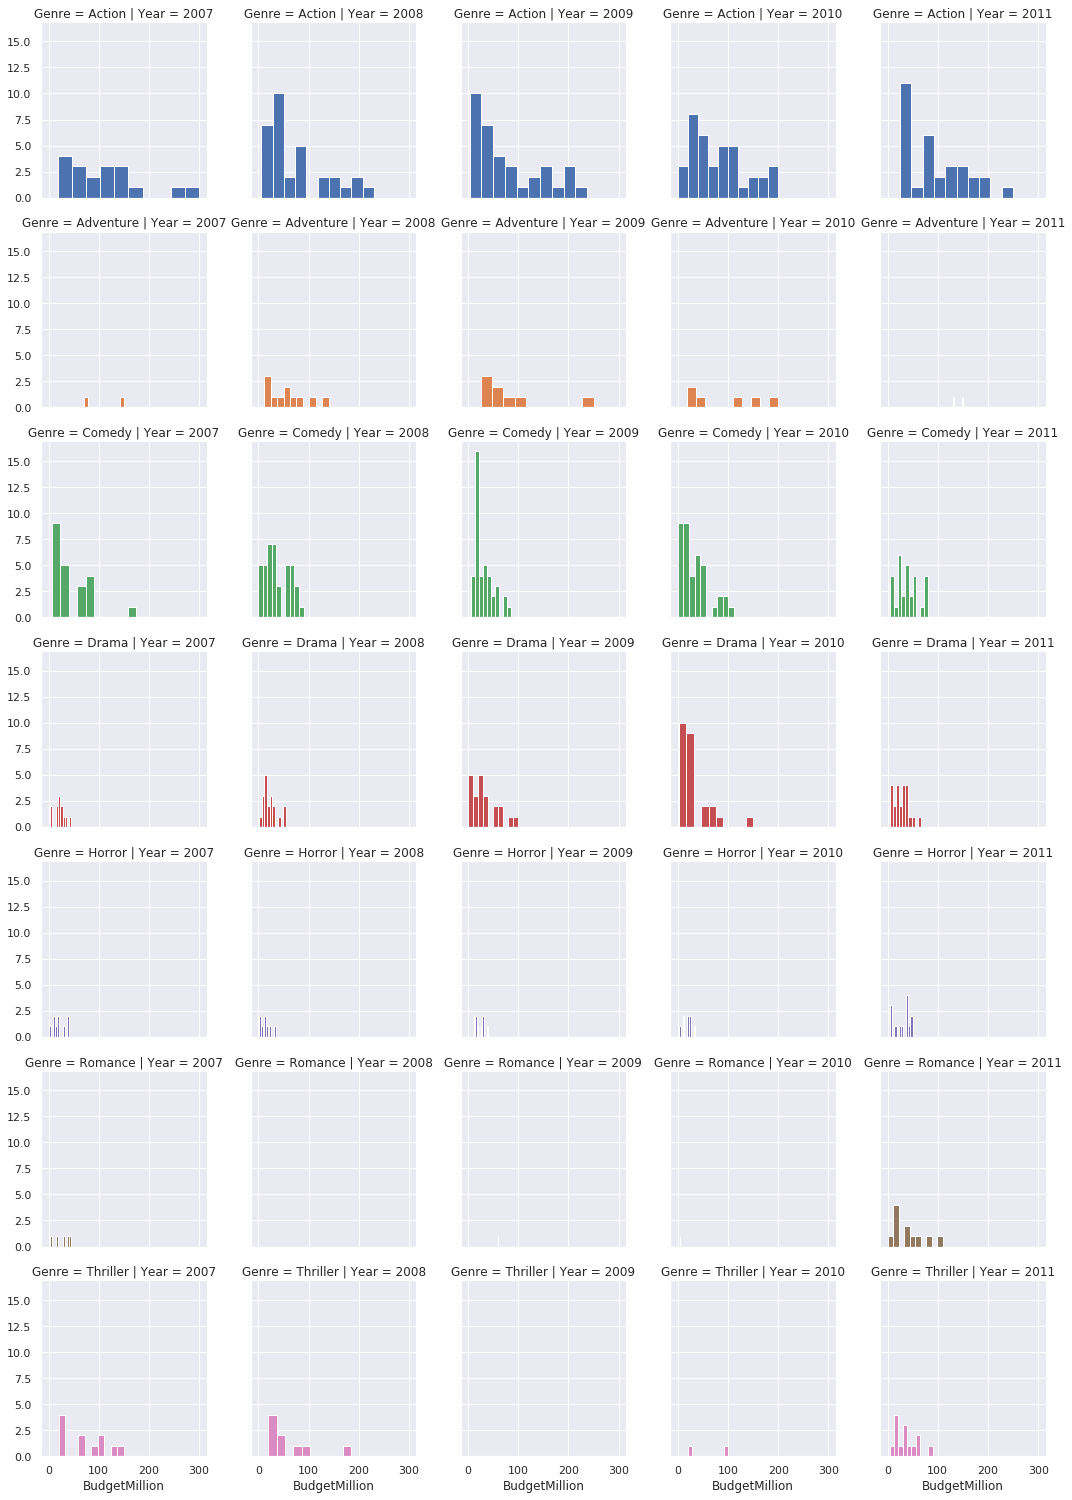

In [74]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillion')

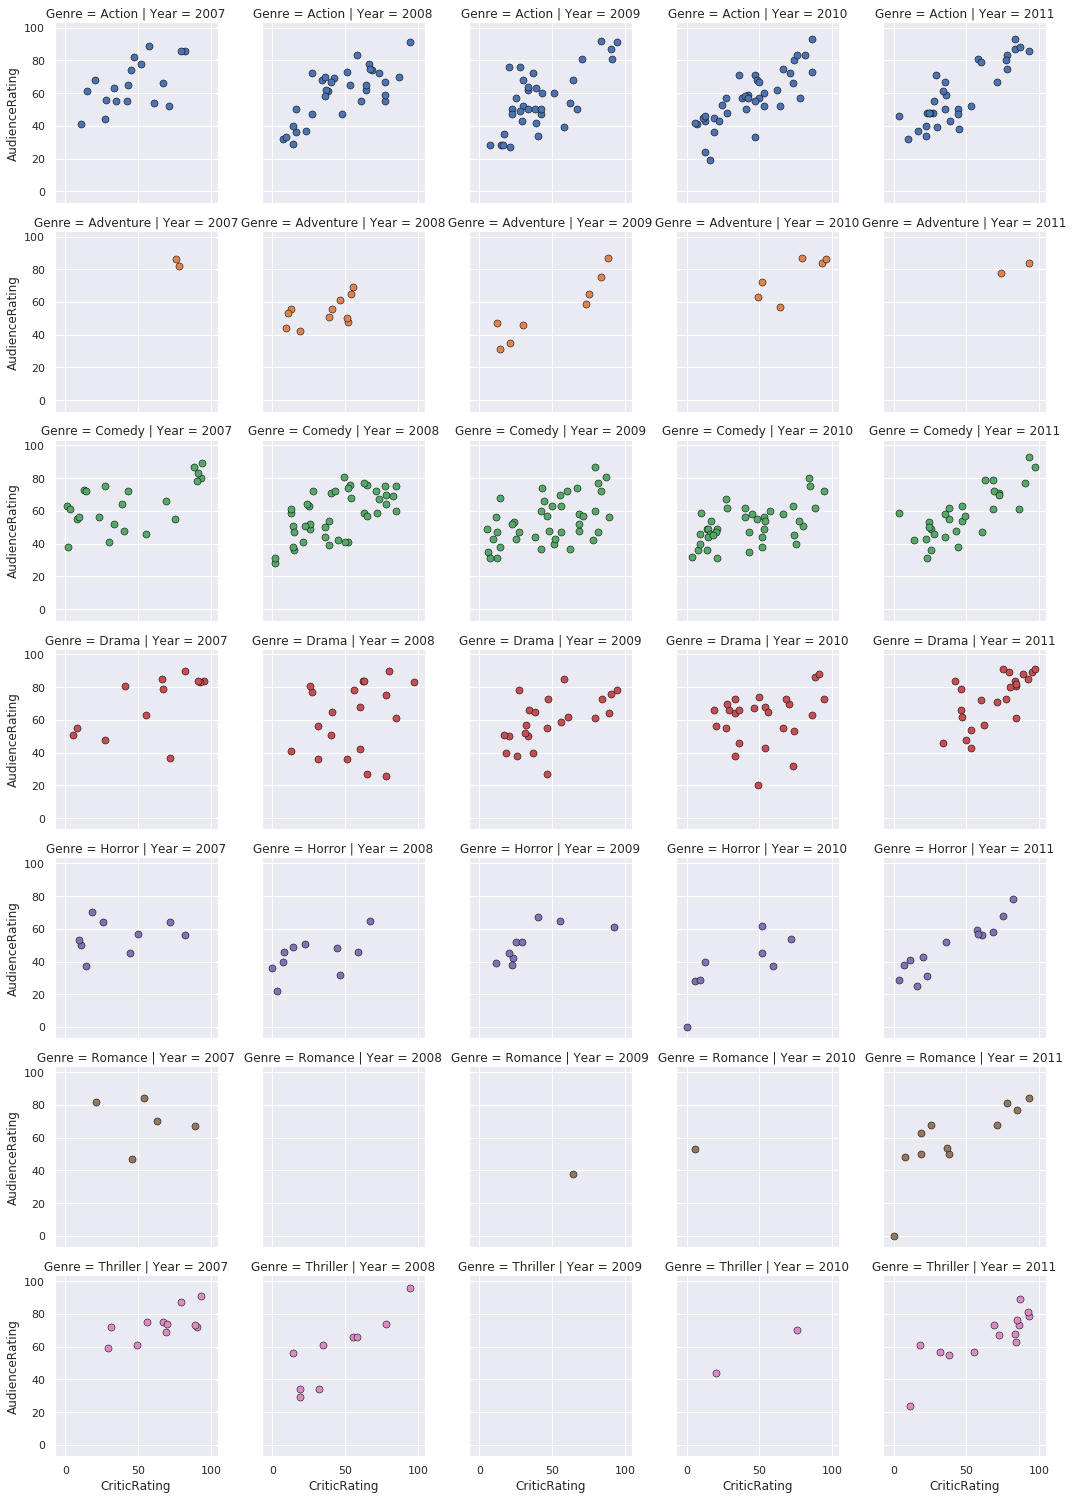

In [75]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

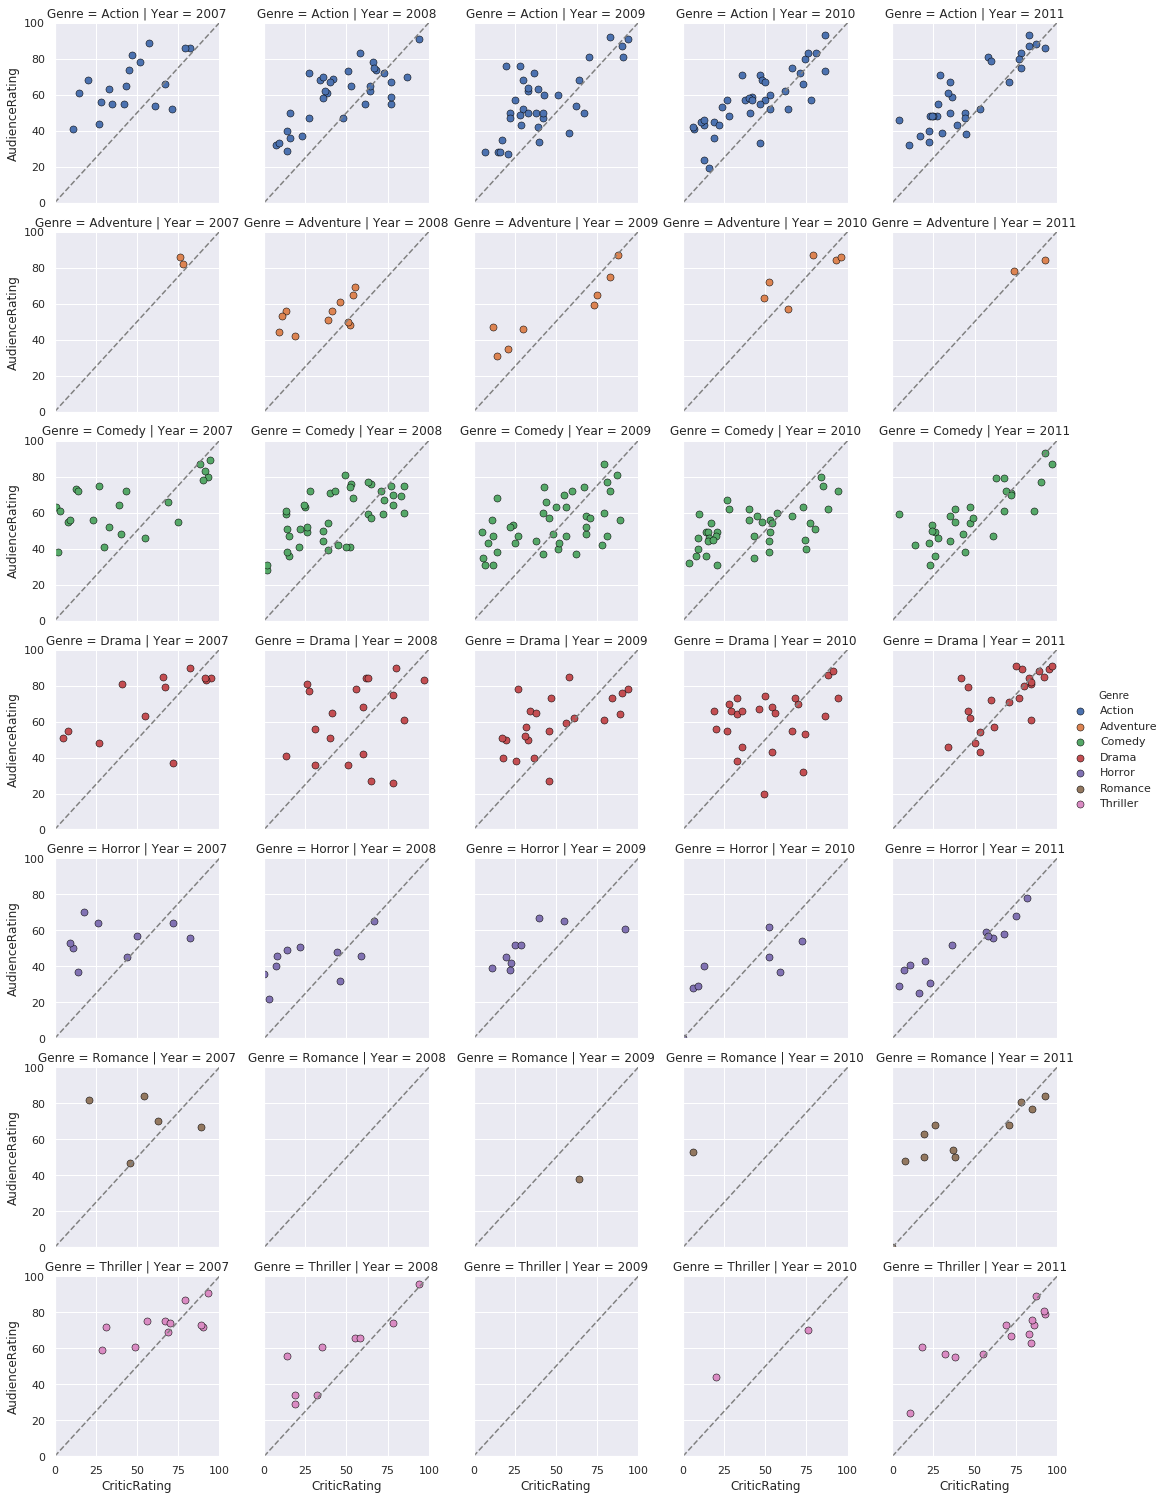

In [80]:
#Controlling Axes and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

In [81]:
# Building Dashboards

In [82]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

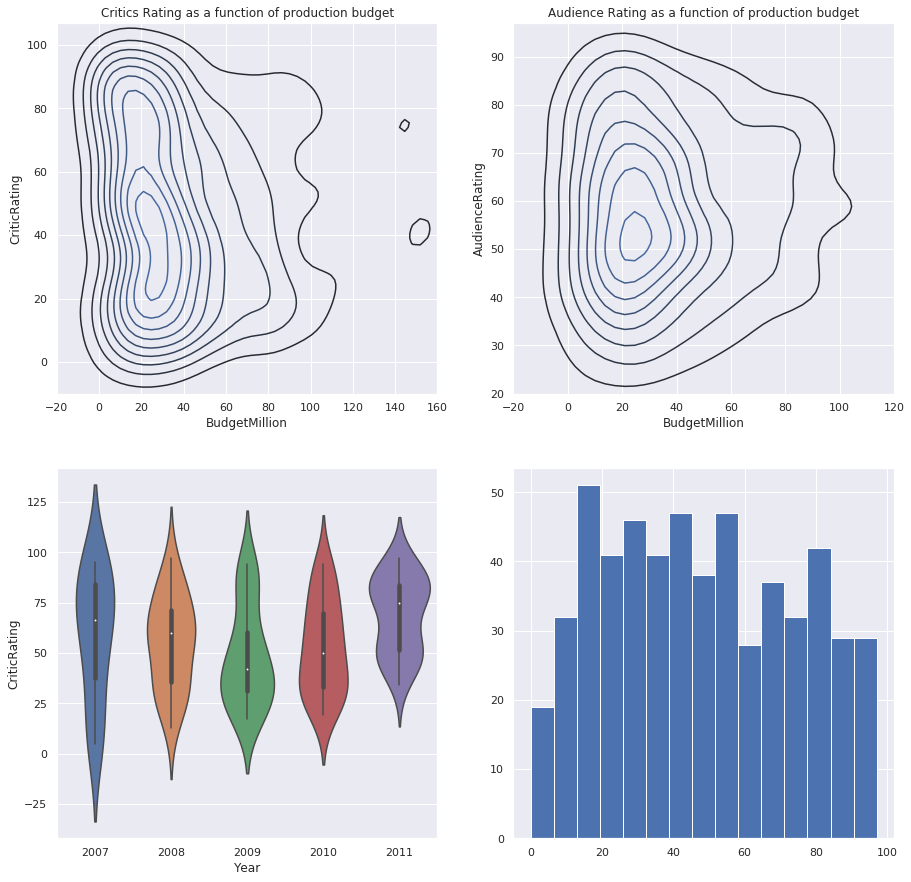

In [95]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[0,0])
k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])
axes[1,1].hist(movies.CriticRating, bins=15)

#kd1 = sns.kdeplot(movies.CriticRating,
#                 movies.AudienceRating,
#                 shade=True,
#                 shade_lowest=False,
#                 cmap='Reds',
#                 ax=axes[1,1])
#kd1b = sns.kdeplot(movies.CriticRating,
#                  movies.AudienceRating,
#                  cmap='Reds',
#                  ax=axes[1,1])
plt.show()

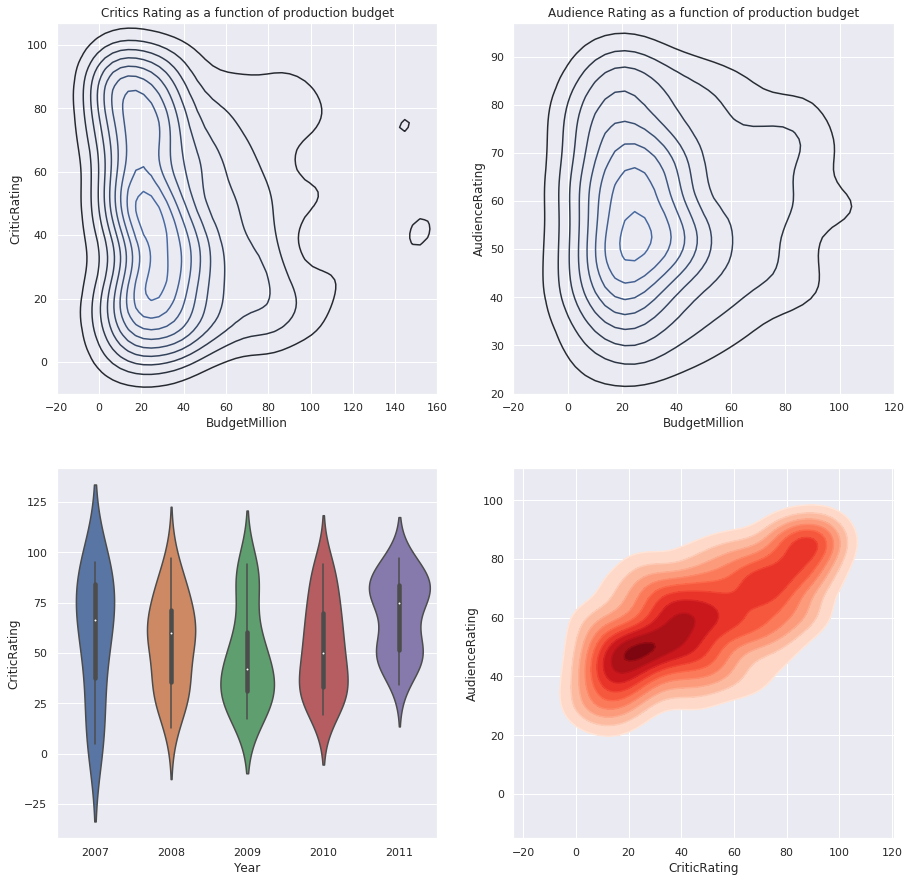

In [96]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.BudgetMillion, movies.AudienceRating, ax=axes[0,1])
k2 = sns.kdeplot(movies.BudgetMillion, movies.CriticRating, ax=axes[0,0])
k1.set(xlim=(-20,120), ylim=(20,97), title='Audience Rating as a function of production budget')
k2.set(xlim=(-20,160), ylim=(-10,107), title='Critics Rating as a function of production budget')
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])

kd1 = sns.kdeplot(movies.CriticRating,
                 movies.AudienceRating,
                 shade=True,
                 shade_lowest=False,
                 cmap='Reds',
                 ax=axes[1,1])
kd1b = sns.kdeplot(movies.CriticRating,
                  movies.AudienceRating,
                  cmap='Reds',
                  ax=axes[1,1])
plt.show()